In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('sleeplengthdata.csv')

In [3]:
data.head()

,Timestamp,Age,Sleep,Wake,lights,occupation,enough_sleep,sleep_8_hours_importance
0,10/14/2020 10:16:36,18,1:00:00 AM,7:00:00 AM,Yes,Student,Yes,5
1,10/14/2020 10:30:13,19,9:30:00 PM,6:00:00 AM,No,Student,Yes,10
2,10/14/2020 10:31:47,18,3:00:00 AM,11:30:00 AM,No,Student,No,5
3,10/14/2020 11:05:36,27,1:00:00 AM,11:45:00 AM,No,Groomer,No,10
4,10/14/2020 11:17:26,23,11:30:00 PM,7:00:00 AM,No,Leasing,No,9


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
def minut_since00(start):
    ampm = start[-2:]
#     print(ampm)
    start_split = start.split(':')
#     print(start_split[1])
    start_minutes = int(start_split[0])*60+int(start_split[1])
    if ampm == "PM":
        if start_split[0] != "12":
            start_minutes += 12*60
        start_minutes = start_minutes%(24*60)
    else:
        if start_split[0] == "12":
            start_minutes -= 12*60
    
    return start_minutes
def time_between(start,finish):
#     ampm = start[-2:]
#     start_split = start.split(':')
#     start_minutes = int(start_split[0])*60+int(start_split[1])
#     if ampm == "PM":
#         start_minutes += 12*60
#         start_minutes = start_minutes%(24*60)
    start_minutes = minut_since00(start)
    finish_minutes = minut_since00(finish)
    length = int()
    if start_minutes>finish_minutes :
        length = 24*60-start_minutes + finish_minutes
    else:
        length = finish_minutes - start_minutes
        
    return length
    

In [6]:
for i in range(data.shape[0]):
    data.at[i,"Sleep_Length"] = time_between(data["Sleep"][i],data["Wake"][i])/60

In [7]:
data.describe()

,Age,sleep_8_hours_importance,Sleep_Length
count,124.000000,124.000000,124.000000
mean,22.491935,7.645161,7.362500
std,9.954772,2.334588,1.655848
min,11.000000,1.000000,1.000000
25%,17.000000,6.000000,6.012500
50%,19.000000,8.000000,7.500000
75%,24.250000,10.000000,8.500000
max,71.000000,10.000000,11.000000


## demografi

distribusi umur partisipan

(0.0, 100.0)

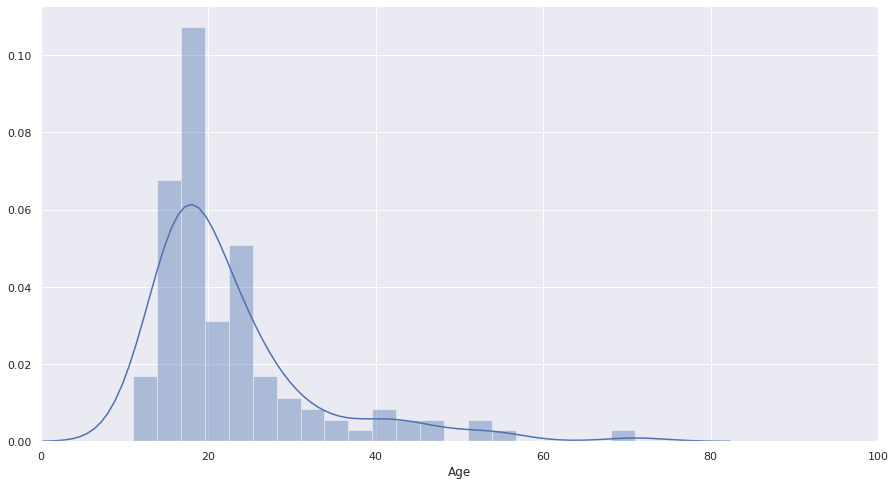

In [8]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['Age'])
plt.xlim([0,100])

(0.0, 100.0)

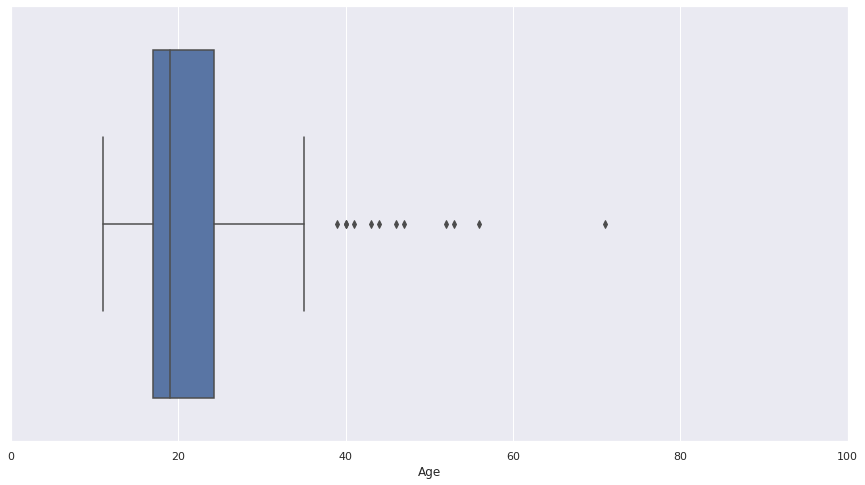

In [9]:
f, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=data['Age'])
plt.xlim([0,100])

In [10]:
data.Age.describe()

count    124.000000
mean      22.491935
std        9.954772
min       11.000000
25%       17.000000
50%       19.000000
75%       24.250000
max       71.000000
Name: Age, dtype: float64

Banyaknya jenis pekerjaan dalam data set ini

In [11]:
len(data.occupation.unique())

46

<Figure size 1440x720 with 0 Axes>

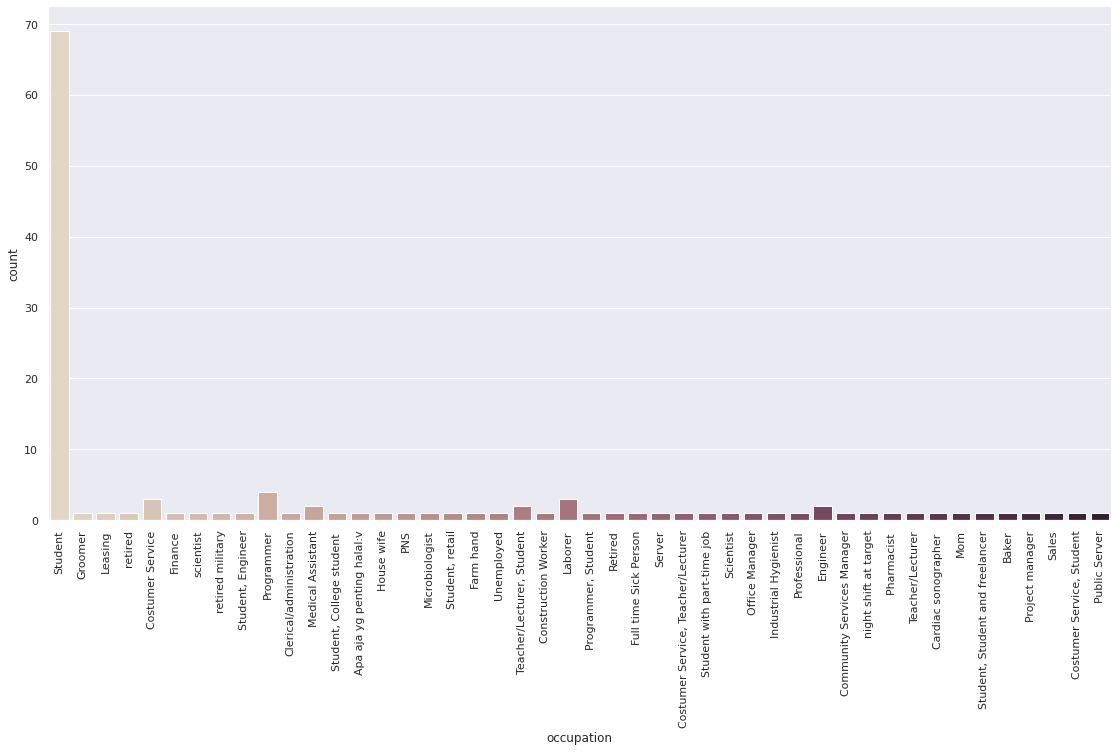

In [12]:
plt.figure(figsize=(20, 10))
sns.catplot(x="occupation", kind="count", palette="ch:.25", height=8, aspect=2, data=data);
plt.xticks(rotation=90);

(0.0, 12.0)

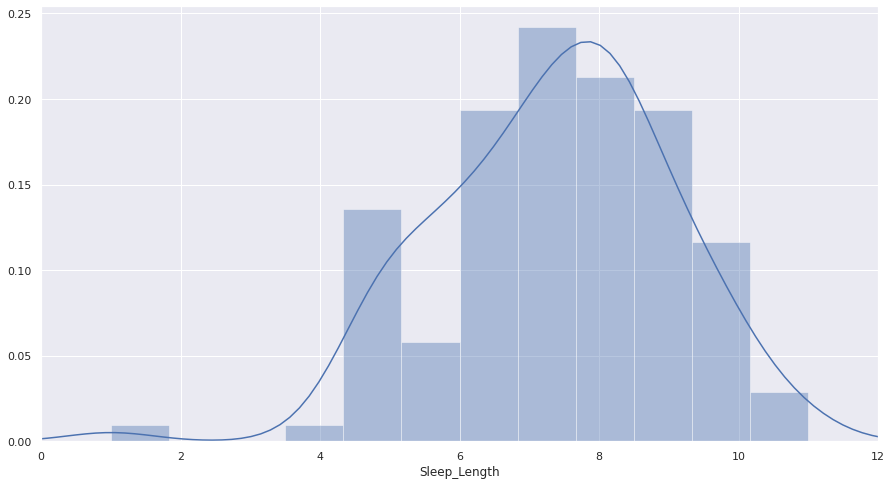

In [13]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['Sleep_Length'],bins=12)
plt.xlim([0,12])

(0.0, 12.0)

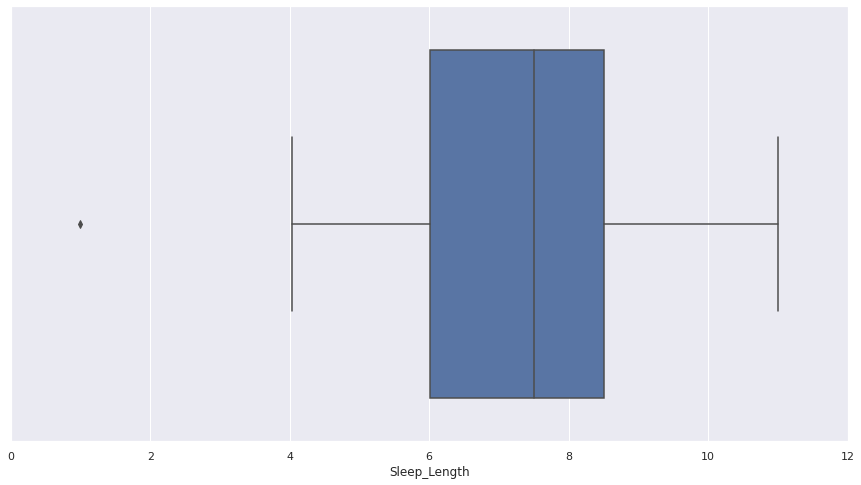

In [14]:
f, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=data['Sleep_Length'])
plt.xlim([0,12])

In [15]:
data.Sleep_Length.describe()

count    124.000000
mean       7.362500
std        1.655848
min        1.000000
25%        6.012500
50%        7.500000
75%        8.500000
max       11.000000
Name: Sleep_Length, dtype: float64

(10.0, 80.0)

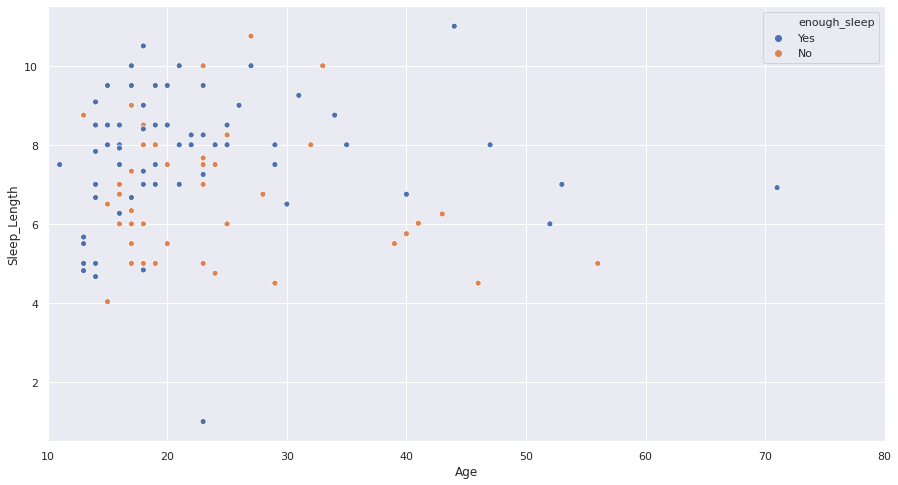

In [16]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="Age", y="Sleep_Length",hue='enough_sleep')
plt.xlim([10,80])

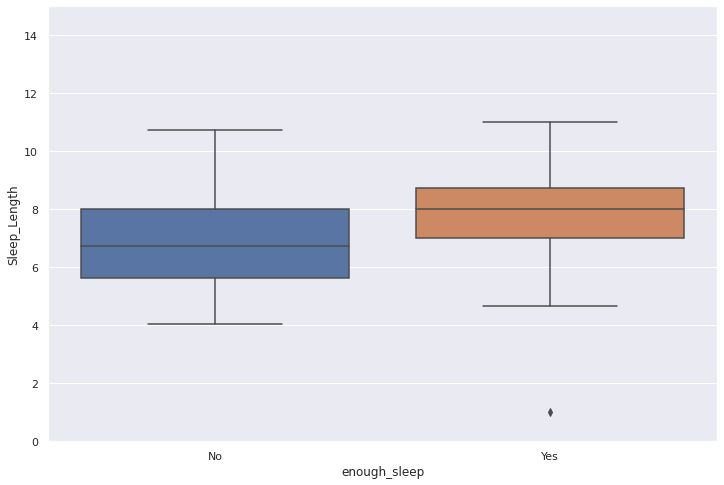

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='enough_sleep', y="Sleep_Length", data=data.sort_values('enough_sleep'))
fig.axis(ymin=0, ymax=15);

In [18]:
for i in range(data.shape[0]):
    data.at[i,"sleep_time_val"] = minut_since00(data["Sleep"][i])/60
    data.at[i,"wake_time_val"] = minut_since00(data["Wake"][i])/60

(0.0, 25.0)

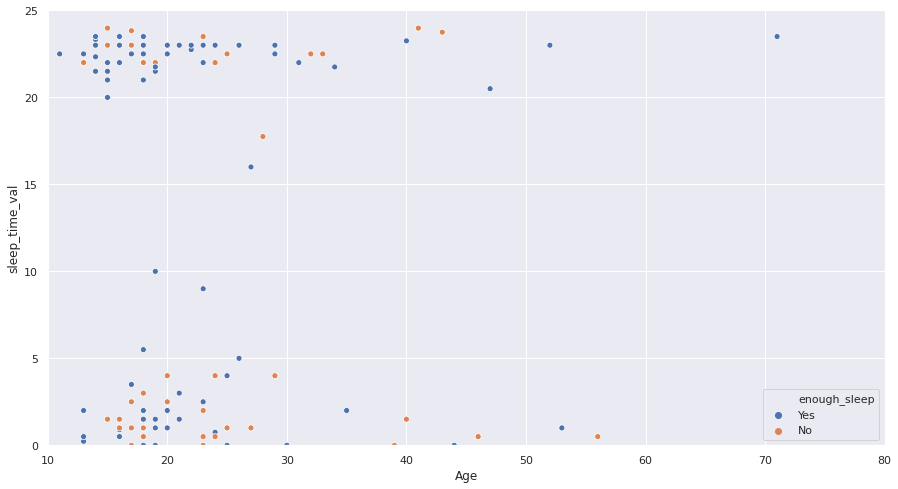

In [19]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="Age", y="sleep_time_val",hue='enough_sleep')
plt.xlim([10,80])
plt.ylim([0,25])

(0.0, 25.0)

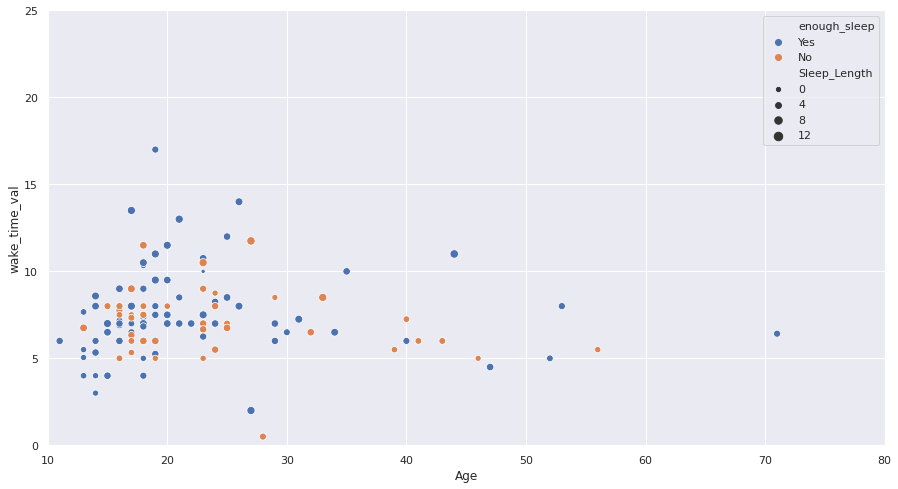

In [20]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="Age", y="wake_time_val",hue='enough_sleep',size="Sleep_Length")
plt.xlim([10,80])
plt.ylim([0,25])

(0.0, 24.5)

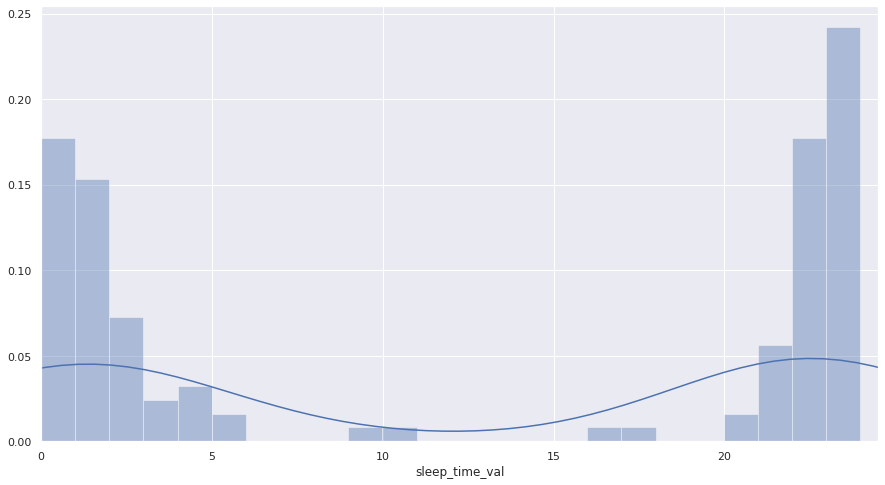

In [21]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['sleep_time_val'],bins=24)
plt.xlim([0,24.5])

(0.0, 24.5)

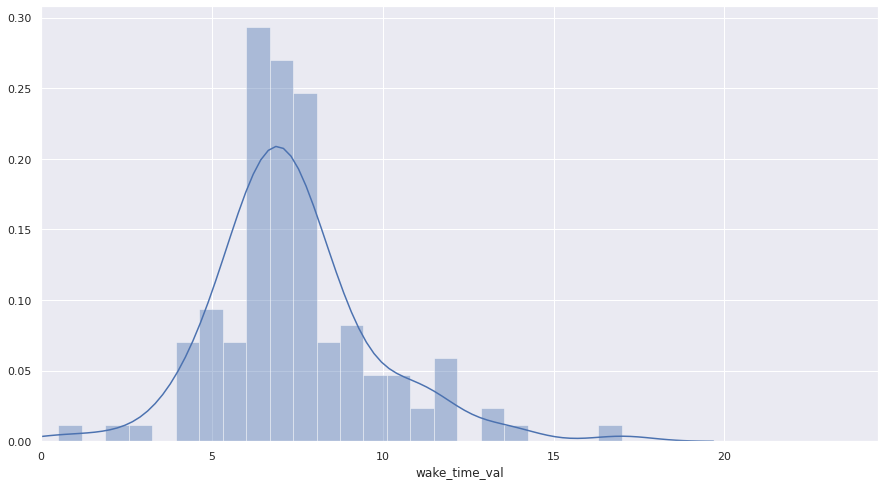

In [22]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['wake_time_val'],bins=24)
plt.xlim([0,24.5])

In [23]:
for i in range(data.shape[0]):
#     if minut_since00(data["Sleep"][i])/60 > 12
    data.at[i,"sleep_time_val_translated"] = minut_since00(data["Sleep"][i])/60
    if data.at[i,"sleep_time_val_translated"] > 12:
        data.at[i,"sleep_time_val_translated"] -=24

(10.0, 80.0)

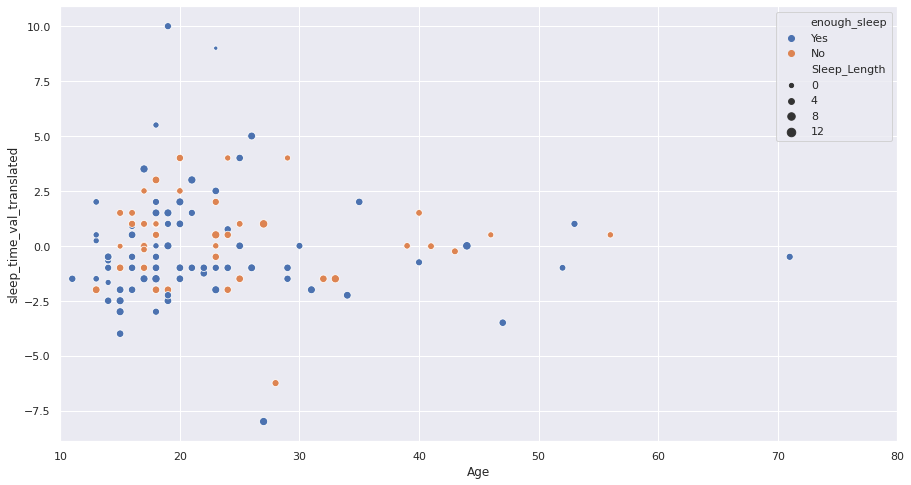

In [24]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="Age", y="sleep_time_val_translated",hue='enough_sleep',size="Sleep_Length")
plt.xlim([10,80])
# plt.ylim([0,25])

(-10.0, 10.0)

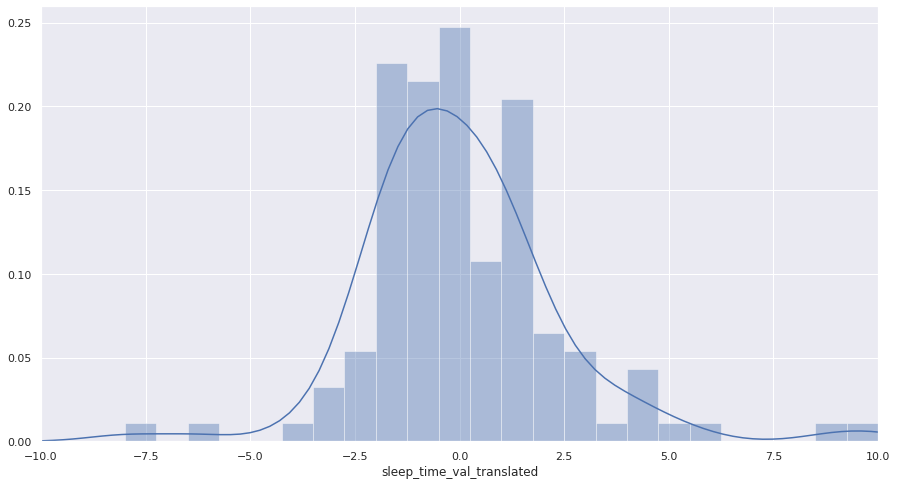

In [25]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['sleep_time_val_translated'],bins=24)
plt.xlim([-10,10])

(-10.0, 10.0)

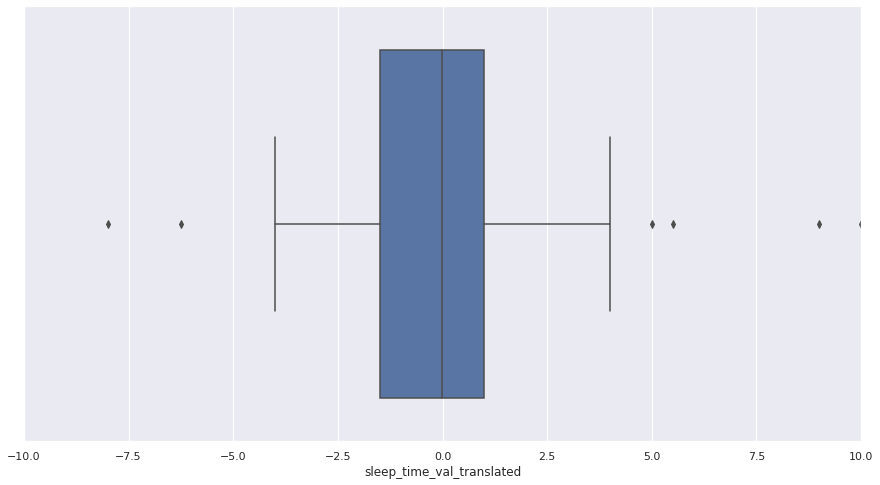

In [26]:
f, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=data['sleep_time_val_translated'])
plt.xlim([-10,10])

In [27]:
data.sleep_time_val_translated.describe()

count    124.000000
mean       0.017608
std        2.333116
min       -8.000000
25%       -1.500000
50%       -0.016667
75%        1.000000
max       10.000000
Name: sleep_time_val_translated, dtype: float64

In [28]:
students = data[data.occupation=='Student']
worker = data[data.occupation!='Student']

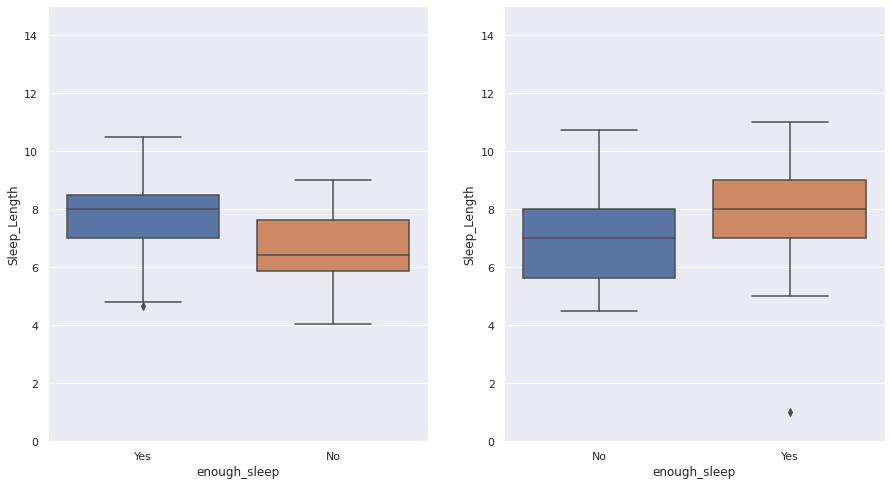

In [29]:
f, ax = plt.subplots(1,2,figsize=(15,8))
fig = sns.boxplot(x='enough_sleep', y="Sleep_Length", data=students,ax=ax[0])
fig.axis(ymin=0, ymax=15);
fig = sns.boxplot(x='enough_sleep', y="Sleep_Length", data=worker,ax=ax[1])
fig.axis(ymin=0, ymax=15);

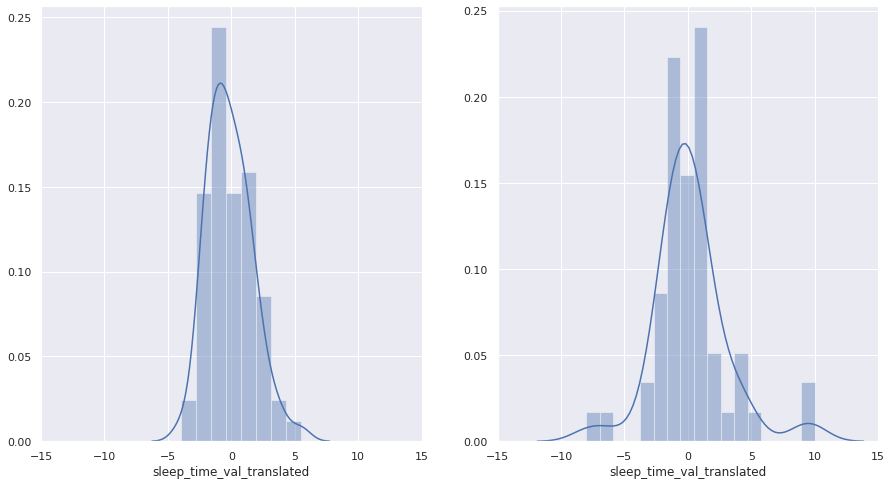

In [30]:
f, ax = plt.subplots(1,2,figsize=(15,8))
fig = sns.distplot(students['sleep_time_val_translated'],ax=ax[0])
fig.axis(xmin=-15, xmax=15);
fig = sns.distplot(worker['sleep_time_val_translated'],ax=ax[1])
fig.axis(xmin=-15, xmax=15);

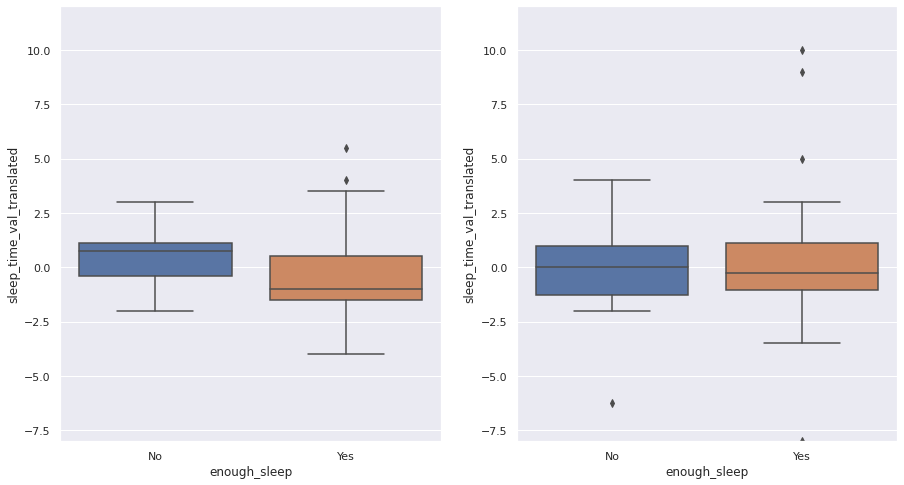

In [31]:
f, ax = plt.subplots(1,2,figsize=(15,8))
fig = sns.boxplot(x='enough_sleep', y="sleep_time_val_translated", data=students.sort_values('enough_sleep'),ax=ax[0])
fig.axis(ymin=-8, ymax=12);
fig = sns.boxplot(x='enough_sleep', y="sleep_time_val_translated", data=worker.sort_values('enough_sleep'),ax=ax[1])
fig.axis(ymin=-8, ymax=12);

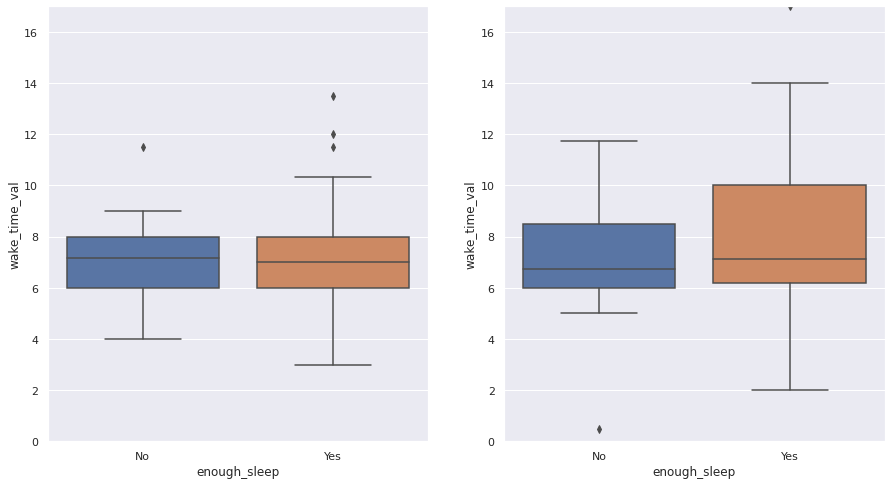

In [32]:
f, ax = plt.subplots(1,2,figsize=(15,8))
fig = sns.boxplot(x='enough_sleep', y="wake_time_val", data=students.sort_values('enough_sleep'),ax=ax[0])
fig.axis(ymin=0, ymax=17);
fig = sns.boxplot(x='enough_sleep', y="wake_time_val", data=worker.sort_values('enough_sleep'),ax=ax[1])
fig.axis(ymin=0, ymax=17);

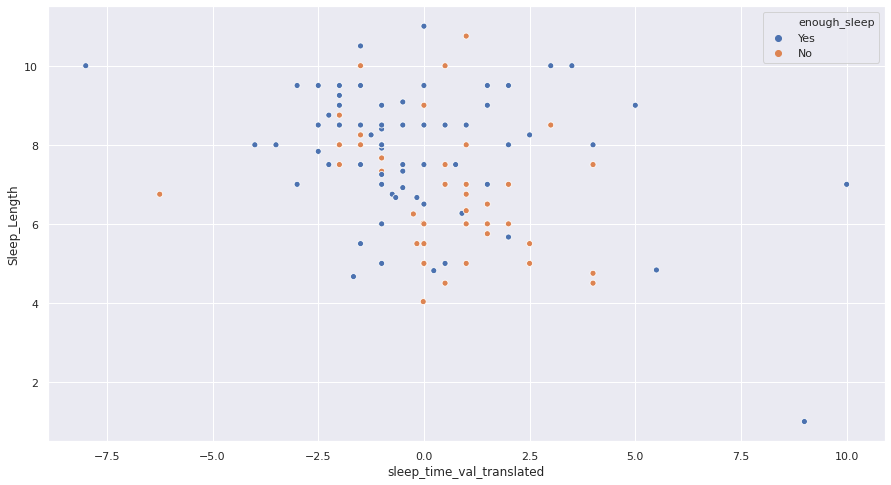

In [33]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="sleep_time_val_translated", y="Sleep_Length",hue='enough_sleep')
# plt.xlim([10,80])
# plt.ylim([0,25])

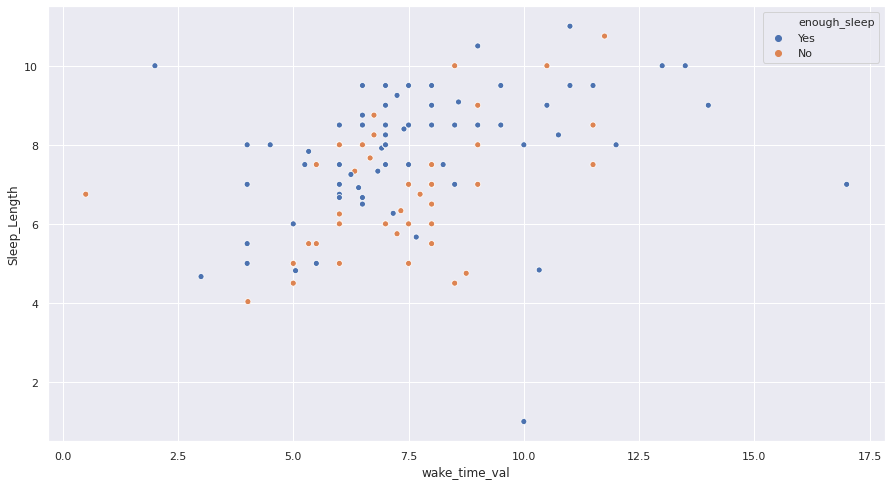

In [34]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="wake_time_val", y="Sleep_Length",hue='enough_sleep')
# plt.xlim([10,80])
# plt.ylim([0,25])

In [35]:
data.head()

,Timestamp,Age,Sleep,Wake,lights,occupation,enough_sleep,sleep_8_hours_importance,Sleep_Length,sleep_time_val,wake_time_val,sleep_time_val_translated
0,10/14/2020 10:16:36,18,1:00:00 AM,7:00:00 AM,Yes,Student,Yes,5,6.00,1.0,7.00,1.0
1,10/14/2020 10:30:13,19,9:30:00 PM,6:00:00 AM,No,Student,Yes,10,8.50,21.5,6.00,-2.5
2,10/14/2020 10:31:47,18,3:00:00 AM,11:30:00 AM,No,Student,No,5,8.50,3.0,11.50,3.0
3,10/14/2020 11:05:36,27,1:00:00 AM,11:45:00 AM,No,Groomer,No,10,10.75,1.0,11.75,1.0
4,10/14/2020 11:17:26,23,11:30:00 PM,7:00:00 AM,No,Leasing,No,9,7.50,23.5,7.00,-0.5


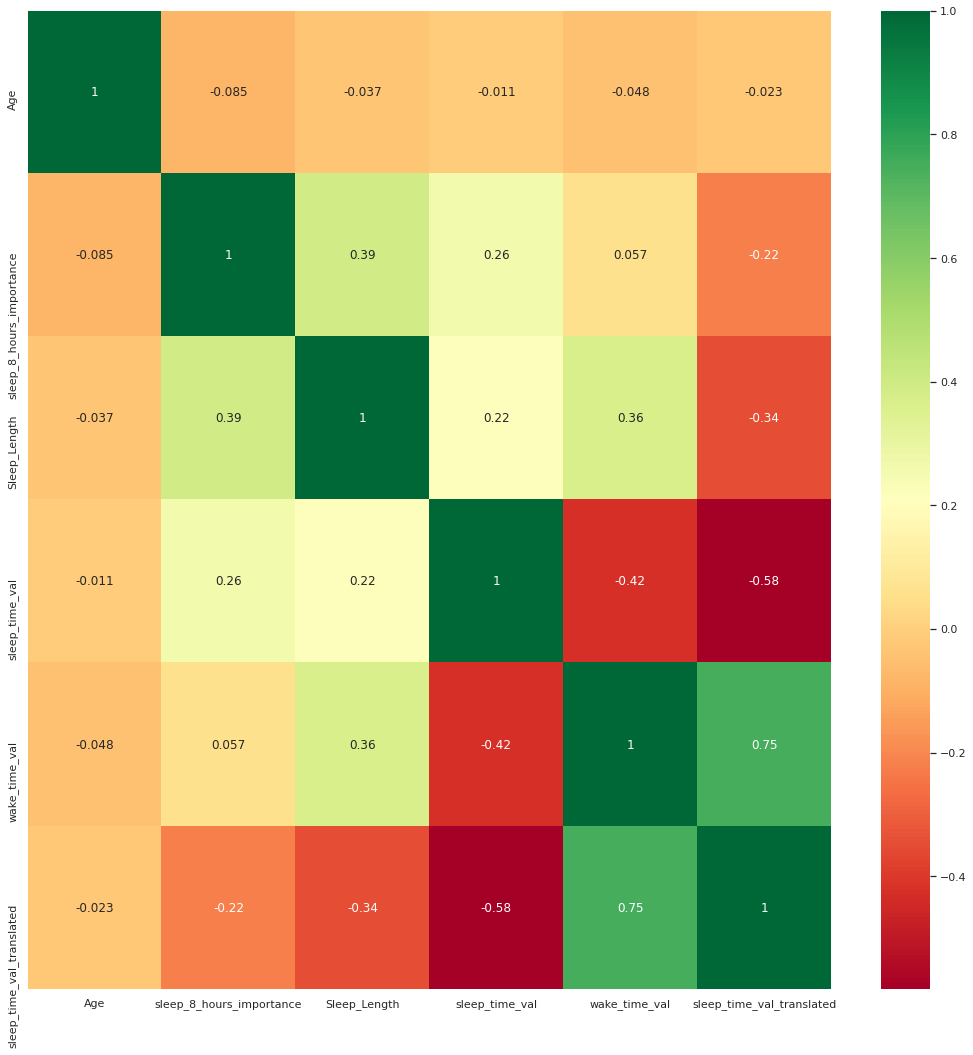

In [36]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [37]:
data.wake_time_val.describe()

count    124.000000
mean       7.380108
std        2.353551
min        0.500000
25%        6.000000
50%        7.000000
75%        8.312500
max       17.000000
Name: wake_time_val, dtype: float64

(0.0, 18.0)

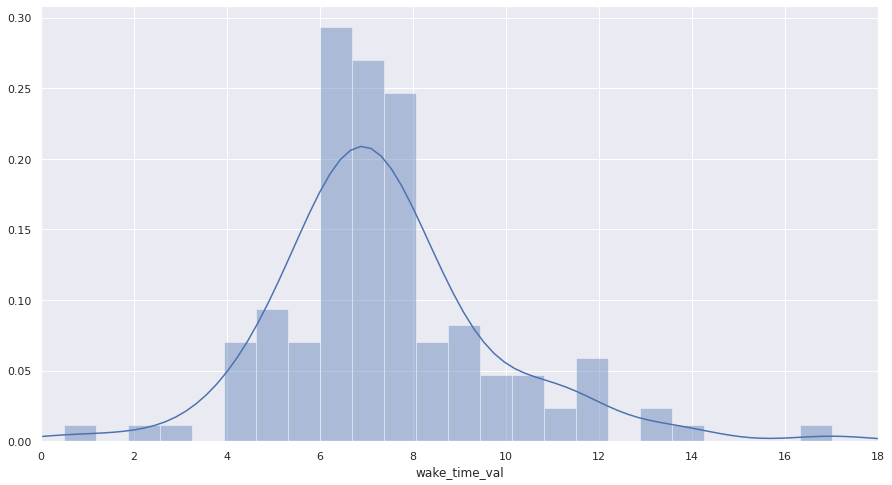

In [38]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['wake_time_val'],bins=24)
plt.xlim([0,18])

In [39]:
data.head()

,Timestamp,Age,Sleep,Wake,lights,occupation,enough_sleep,sleep_8_hours_importance,Sleep_Length,sleep_time_val,wake_time_val,sleep_time_val_translated
0,10/14/2020 10:16:36,18,1:00:00 AM,7:00:00 AM,Yes,Student,Yes,5,6.00,1.0,7.00,1.0
1,10/14/2020 10:30:13,19,9:30:00 PM,6:00:00 AM,No,Student,Yes,10,8.50,21.5,6.00,-2.5
2,10/14/2020 10:31:47,18,3:00:00 AM,11:30:00 AM,No,Student,No,5,8.50,3.0,11.50,3.0
3,10/14/2020 11:05:36,27,1:00:00 AM,11:45:00 AM,No,Groomer,No,10,10.75,1.0,11.75,1.0
4,10/14/2020 11:17:26,23,11:30:00 PM,7:00:00 AM,No,Leasing,No,9,7.50,23.5,7.00,-0.5


In [40]:
data.sleep_8_hours_importance.describe()

count    124.000000
mean       7.645161
std        2.334588
min        1.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       10.000000
Name: sleep_8_hours_importance, dtype: float64

(0.0, 10.0)

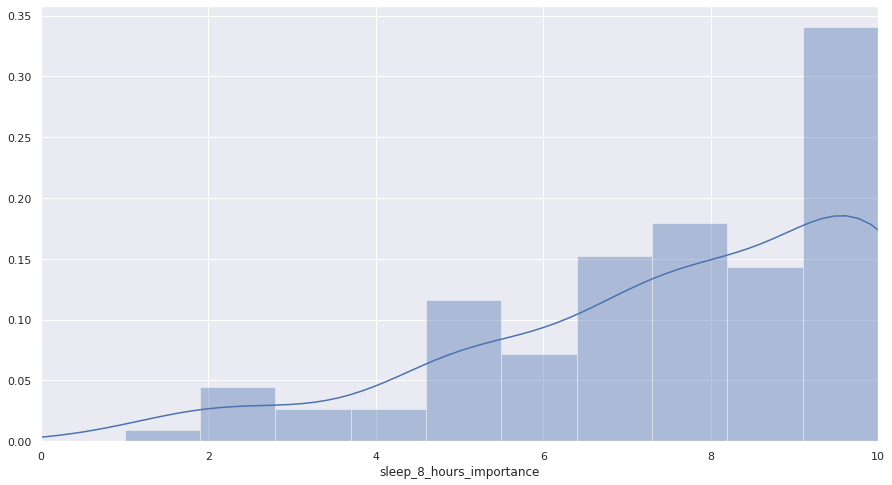

In [41]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['sleep_8_hours_importance'],bins=10)
plt.xlim([0,10])

In [42]:
data.head()

,Timestamp,Age,Sleep,Wake,lights,occupation,enough_sleep,sleep_8_hours_importance,Sleep_Length,sleep_time_val,wake_time_val,sleep_time_val_translated
0,10/14/2020 10:16:36,18,1:00:00 AM,7:00:00 AM,Yes,Student,Yes,5,6.00,1.0,7.00,1.0
1,10/14/2020 10:30:13,19,9:30:00 PM,6:00:00 AM,No,Student,Yes,10,8.50,21.5,6.00,-2.5
2,10/14/2020 10:31:47,18,3:00:00 AM,11:30:00 AM,No,Student,No,5,8.50,3.0,11.50,3.0
3,10/14/2020 11:05:36,27,1:00:00 AM,11:45:00 AM,No,Groomer,No,10,10.75,1.0,11.75,1.0
4,10/14/2020 11:17:26,23,11:30:00 PM,7:00:00 AM,No,Leasing,No,9,7.50,23.5,7.00,-0.5


In [43]:
cordat = data[['Age','lights','enough_sleep','sleep_8_hours_importance','Sleep_Length','sleep_time_val_translated','wake_time_val']]

In [44]:
cordat.head()

,Age,lights,enough_sleep,sleep_8_hours_importance,Sleep_Length,sleep_time_val_translated,wake_time_val
0,18,Yes,Yes,5,6.00,1.0,7.00
1,19,No,Yes,10,8.50,-2.5,6.00
2,18,No,No,5,8.50,3.0,11.50
3,27,No,No,10,10.75,1.0,11.75
4,23,No,No,9,7.50,-0.5,7.00


In [45]:
def strtobool(s):
    if s=="Yes":
        return 1
    else:
        return 0

In [71]:
cordat.lights = data.lights.map(strtobool)

/home/dion/anaconda3/envs/ds_env/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
strtobool("Yes")

1

In [66]:
cordat.enough_sleep = cordat.enough_sleep.map(strtobool)

/home/dion/anaconda3/envs/ds_env/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
cordat.enough_sleep.map(strtobool)

0      1
1      1
2      0
3      0
4      0
      ..
119    1
120    1
121    0
122    0
123    1
Name: enough_sleep, Length: 124, dtype: int64

In [74]:
def isstudent(s):
    if s == "Student":
        return 0
    else:
        return 1

cordat['occupation'] = data.occupation.map(isstudent)

<ipython-input-74-e7d6e805a70c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cordat['occupation'] = data.occupation.map(isstudent)


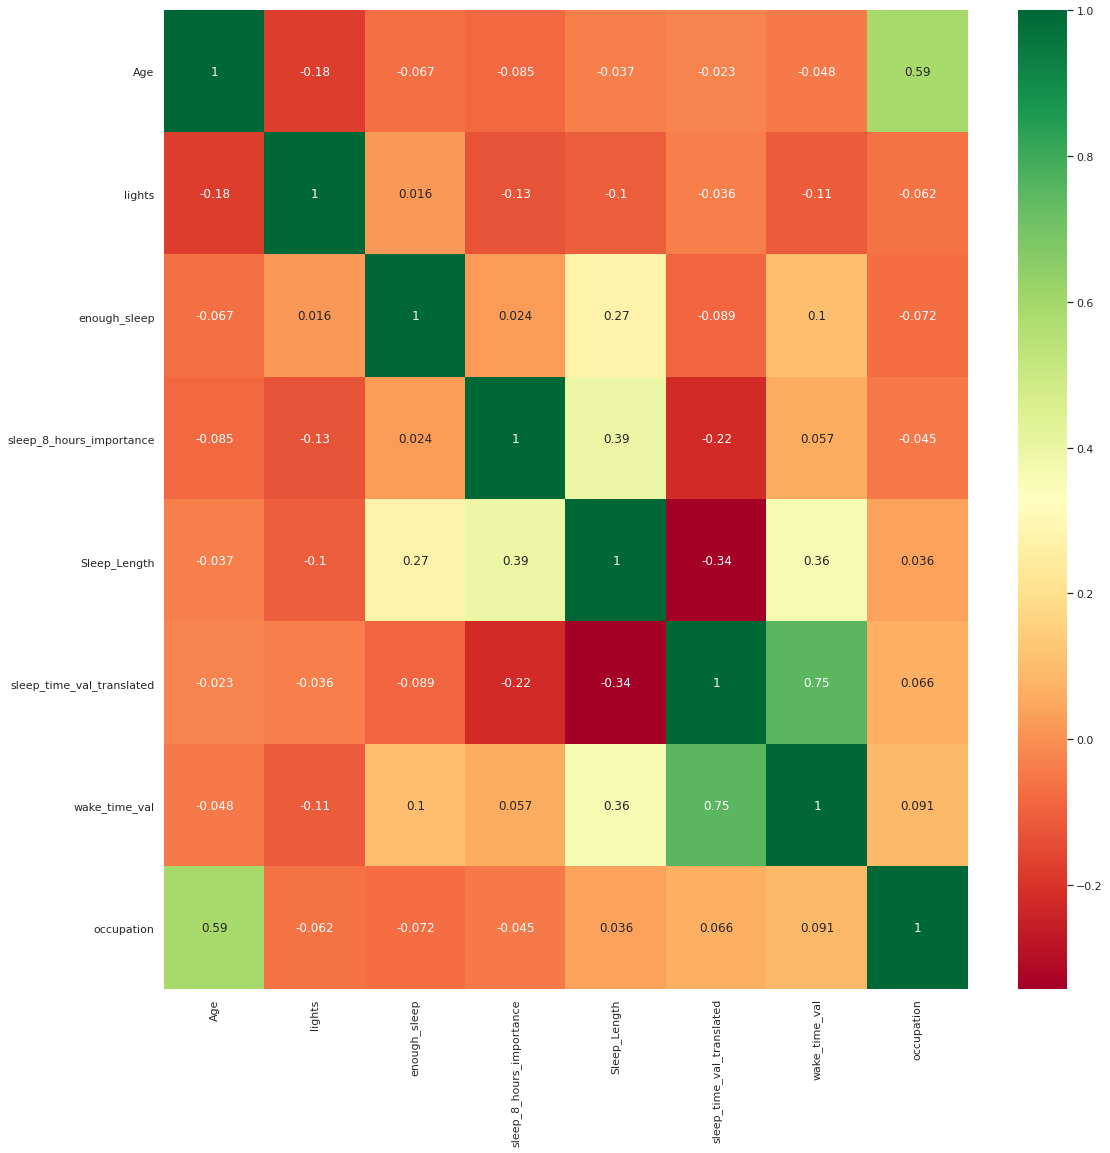

In [76]:
plt.figure(figsize=(18,18))
sns.heatmap(cordat.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [75]:
cordat.head()


,Age,lights,enough_sleep,sleep_8_hours_importance,Sleep_Length,sleep_time_val_translated,wake_time_val,occupation
0,18,1,1,5,6.00,1.0,7.00,0
1,19,0,1,10,8.50,-2.5,6.00,0
2,18,0,0,5,8.50,3.0,11.50,0
3,27,0,0,10,10.75,1.0,11.75,1
4,23,0,0,9,7.50,-0.5,7.00,1


<Figure size 1440x720 with 0 Axes>

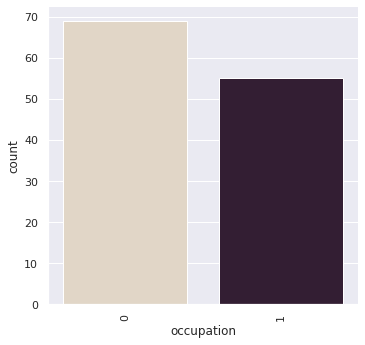

In [77]:
plt.figure(figsize=(20, 10))
sns.catplot(x="occupation", kind="count", palette="ch:.25", data=cordat);
plt.xticks(rotation=90);